In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=1000)


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


17465344/17464789 [==============================] - 25s 1us/step


In [2]:
train_data.shape

(25000,)

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(train_data)
y_train = np.asarray(train_labels).astype('float32')
y_train = np.asarray(test_labels).astype('float32')

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [6]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [7]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=5,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 5s 344us/step - loss: 0.6934 - acc: 0.4987 - val_loss: 0.6937 - val_acc: 0.4969
Epoch 2/5
15000/15000 [==============================] - 2s 143us/step - loss: 0.6904 - acc: 0.5336 - val_loss: 0.6940 - val_acc: 0.5012
Epoch 3/5
15000/15000 [==============================] - 2s 138us/step - loss: 0.6813 - acc: 0.5770 - val_loss: 0.6977 - val_acc: 0.5053
Epoch 4/5
15000/15000 [==============================] - 2s 135us/step - loss: 0.6700 - acc: 0.6003 - val_loss: 0.7026 - val_acc: 0.5048
Epoch 5/5
15000/15000 [==============================] - 2s 138us/step - loss: 0.6593 - acc: 0.6175 - val_loss: 0.7113 - val_acc: 0.5037


AttributeError: 'dict' object has no attribute 'val_loss'

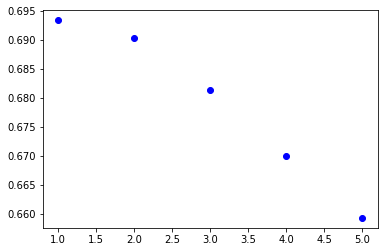

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, history_dict['val_loss', 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.lagend()

plt.show()


In [11]:
epochs

NameError: name 'epochs' is not defined

In [14]:
history_dict

{'acc': [0.4986666665236155,
  0.5336000000317891,
  0.5770000002861023,
  0.6003333334287008,
  0.6174666668256124],
 'loss': [0.6934249540964762,
  0.6903915576934815,
  0.68134447889328,
  0.6699648264249166,
  0.659257148996989],
 'val_acc': [0.4969000001907349,
  0.5011999999523162,
  0.5053000002384186,
  0.5048000003814698,
  0.5037000001430512],
 'val_loss': [0.693738568019867,
  0.693980417060852,
  0.6977011001586914,
  0.7026053644180298,
  0.7113022333145141]}